In [1]:
#représentation des differents objects que nous allons manipuler. 
#l'individu
#x=s,nb_chr,nb_mut
#la population 
#POP=[x1,x2,...,xi,...xn]
#p est la probabilité d'avoir de mâles
p=0.5
pop=25
nb_mutations_par_nucléotide=175
l=5
c=5

In [2]:
import random
def generateursex(p): 
    r=random.random()
    if r<p:
        return 'F'
    else: 
        return 'M'

In [3]:
print(generateursex(0.5) )

F


In [53]:
def generateurmonde(pop):
    E=[]
    for i in range(pop):
        E.append((generateursex(p),23,0))
    return E

In [54]:
print(generateurmonde(pop))

[('F', 23, 0), ('M', 23, 0), ('F', 23, 0), ('F', 23, 0), ('M', 23, 0), ('F', 23, 0), ('M', 23, 0), ('M', 23, 0), ('M', 23, 0), ('F', 23, 0), ('M', 23, 0), ('F', 23, 0), ('F', 23, 0), ('F', 23, 0), ('F', 23, 0), ('F', 23, 0), ('F', 23, 0), ('M', 23, 0), ('M', 23, 0), ('M', 23, 0), ('F', 23, 0), ('F', 23, 0), ('M', 23, 0), ('M', 23, 0), ('M', 23, 0)]


In [55]:
E=[('F', 23, 0), ('M', 23, 0), ('F', 23, 0), ('F', 23, 0), ('M', 23, 0), ('F', 23, 0), ('M', 23, 0), ('M', 23, 0), ('M', 23, 0), ('F', 23, 0), ('M', 23, 0), ('F', 23, 0), ('F', 23, 0), ('F', 23, 0), ('F', 23, 0), ('F', 23, 0), ('F', 23, 0), ('M', 23, 0), ('M', 23, 0), ('M', 23, 0), ('F', 23, 0), ('F', 23, 0), ('M', 23, 0), ('M', 23, 0), ('M', 23, 0)]

In [103]:
print(E[0][2])

0


In [56]:
import numpy as np 
import matplotlib.pyplot as plt
def tab(l,c,E):
    A=np.zeros((l,c))
    k=0
    for i in range(l):
        for j in range(c):
            if E[k][0]=='F':
                A[i][j]=1
                k=k+1
            else:
                A[i][j]=-1
                k=k+1
            
    return A

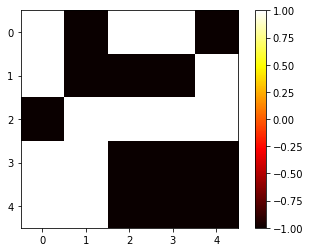

In [87]:
plt.imshow(tab(l,c,E), cmap='hot')
plt.colorbar()
plt.show()

In [ ]:
fonction permettant de savoir si deux individu sont féconds biologiquement. 

In [60]:
def is_couple(IND1,IND2):
    if IND1[0]==IND2[0]:
        return False
    else:
        return True


In [62]:
print(is_couple(('M', 23, 0),('M', 23, 0)))

False


In [71]:
def enfants(couple):
    E=[]
    IND1,IND2=couple
    if is_couple(IND1,IND2) == True:
        nb = random.randint(1,2)
        for e in range (nb):
            E.append((generateursex(p),random.choice([IND1[1],IND2[1]]),random.choice([IND1[2],IND2[2]])))
        return E

In [72]:
print(enfants((('M', 23, 0),('F', 23, 0))))

[('M', 23, 0)]


In [73]:
def couple(E):
    Male=[]
    Femelle=[]
    i=0
    j=0
    for k in range(len(E)):
        if E[k][0]=='M':
            Male.append(E[k])
            i=i+1
        else: 
            Femelle.append(E[k])
            j=j+1
    return Male, Femelle

In [74]:
print(couple(E))

([('M', 23, 0), ('M', 23, 0), ('M', 23, 0), ('M', 23, 0), ('M', 23, 0), ('M', 23, 0), ('M', 23, 0), ('M', 23, 0), ('M', 23, 0), ('M', 23, 0), ('M', 23, 0), ('M', 23, 0)], [('F', 23, 0), ('F', 23, 0), ('F', 23, 0), ('F', 23, 0), ('F', 23, 0), ('F', 23, 0), ('F', 23, 0), ('F', 23, 0), ('F', 23, 0), ('F', 23, 0), ('F', 23, 0), ('F', 23, 0), ('F', 23, 0)])


In [75]:
def creercouple(E):
    Ens=[]
    M,F=couple(E)
    k=0
    N=min(len(M),len(F))
    for e in range(N):
        Ens.append((M[e],F[e]))
        k=k+1
    return Ens 

In [76]:
enscouple=creercouple(E)

In [77]:
print(enscouple)

[(('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0))]


In [78]:
print(enfants(enscouple[0]))

[('F', 23, 0)]


In [79]:
def enfantsmonde(enscouple):
    ensenfant=[]
    for e in enscouple:
        ensenfant.append(enfants(e))
    return ensenfant

In [80]:
print(enfantsmonde(enscouple))

[[('F', 23, 0), ('M', 23, 0)], [('M', 23, 0)], [('F', 23, 0)], [('F', 23, 0), ('M', 23, 0)], [('F', 23, 0)], [('F', 23, 0), ('M', 23, 0)], [('M', 23, 0), ('F', 23, 0)], [('M', 23, 0)], [('M', 23, 0)], [('M', 23, 0)], [('F', 23, 0), ('F', 23, 0)], [('M', 23, 0), ('M', 23, 0)]]


In [ ]:
création du nouveau groupe après fécondation. 

In [81]:
def newmonde(E): 
    newmonde=[]
    newmonde=creercouple(E)+enfantsmonde(creercouple(E))
    return newmonde

In [86]:
print(newmonde(E),"\n", len(newmonde(E)))

[(('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), (('M', 23, 0), ('F', 23, 0)), [('F', 23, 0)], [('M', 23, 0), ('F', 23, 0)], [('M', 23, 0)], [('F', 23, 0)], [('F', 23, 0), ('M', 23, 0)], [('F', 23, 0), ('M', 23, 0)], [('F', 23, 0)], [('M', 23, 0)], [('F', 23, 0), ('M', 23, 0)], [('M', 23, 0), ('M', 23, 0)], [('F', 23, 0)], [('M', 23, 0)]] 
 24


In [128]:
def mutationrand(E):
    new_E_mut=[]
    nb=0
    for i in range(len(E)):
        r=random.choice([0,1])
        if nb<nb_mutations_par_nucléotide and r==1: 
            sex,nb_chr,nb_mut=E[i]
            nb_mut=nb_mut+1
            E[i]=sex,nb_chr,nb_mut
            new_E_mut.append(E[i])
            nb=nb+1
        else: 
            new_E_mut.append(E[i])
    return new_E_mut

In [129]:
print(mutationrand(E))

[('F', 23, 1), ('M', 23, 1), ('F', 23, 1), ('F', 23, 0), ('M', 23, 0), ('F', 23, 1), ('M', 23, 1), ('M', 23, 0), ('M', 23, 1), ('F', 23, 1), ('M', 23, 1), ('F', 23, 0), ('F', 23, 1), ('F', 23, 0), ('F', 23, 1), ('F', 23, 0), ('F', 23, 1), ('M', 23, 1), ('M', 23, 0), ('M', 23, 0), ('F', 23, 1), ('F', 23, 1), ('M', 23, 0), ('M', 23, 0), ('M', 23, 0)]


In [130]:
def tabmut(l,c,E):
    A=np.zeros((l,c))
    k=0
    for i in range(l):
        for j in range(c):
            A[i][j]=E[k][2]/23
            k=k+1
    return A

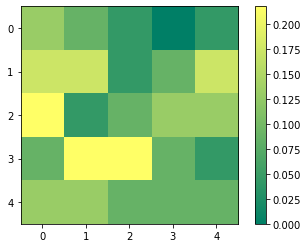

In [134]:
plt.imshow(tabmut(l,c,mutationrand(E)), cmap='summer')
plt.colorbar()
plt.show()